      Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2   17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3   12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7   33.8  24.4  12.6  1.63   
3            27.1      39.1    6.1    6.3  13.5   5.3  1.15   
4            26.5      70.7    6.9   16.0  21.9   5.6  1.01   
...           ...       ...    ...    ...   ...   ...   ...   
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximite_zones_industrielles  Densite_population  Qualite_air  
0                               6.3               319.0            1  
1                               6.0               611.0            1  
2                             

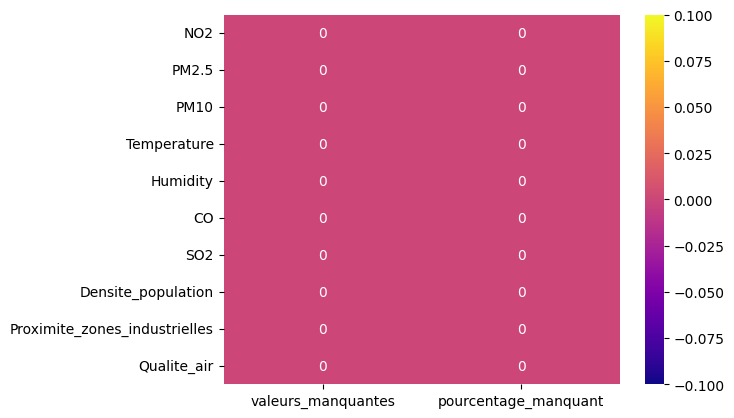

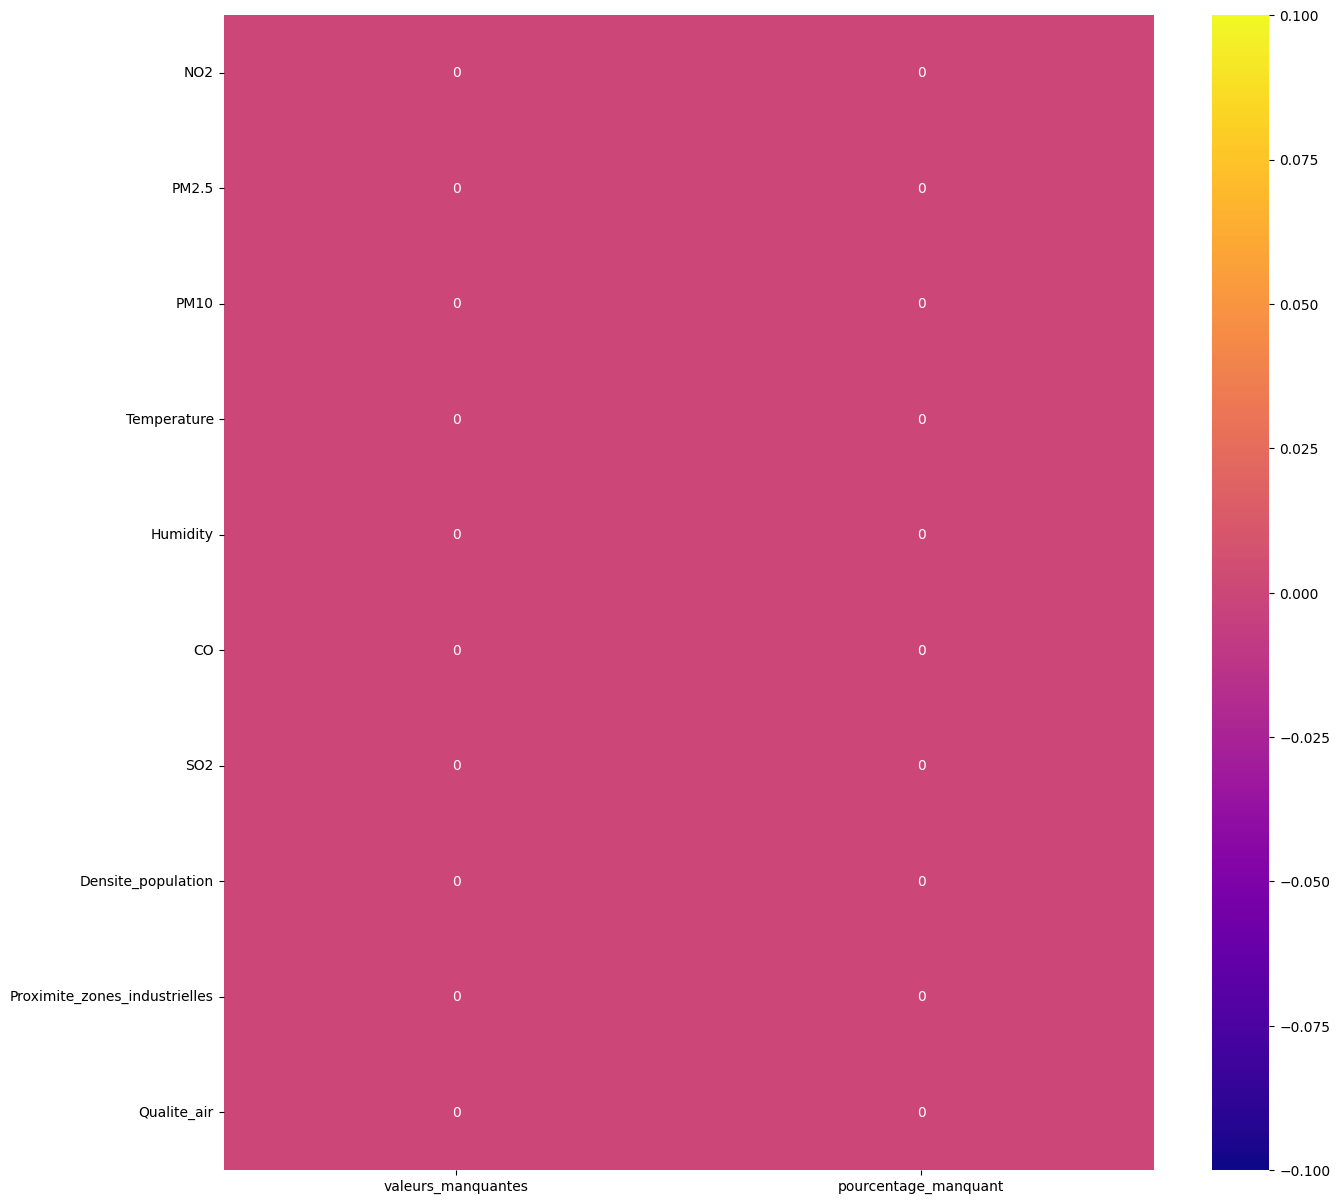

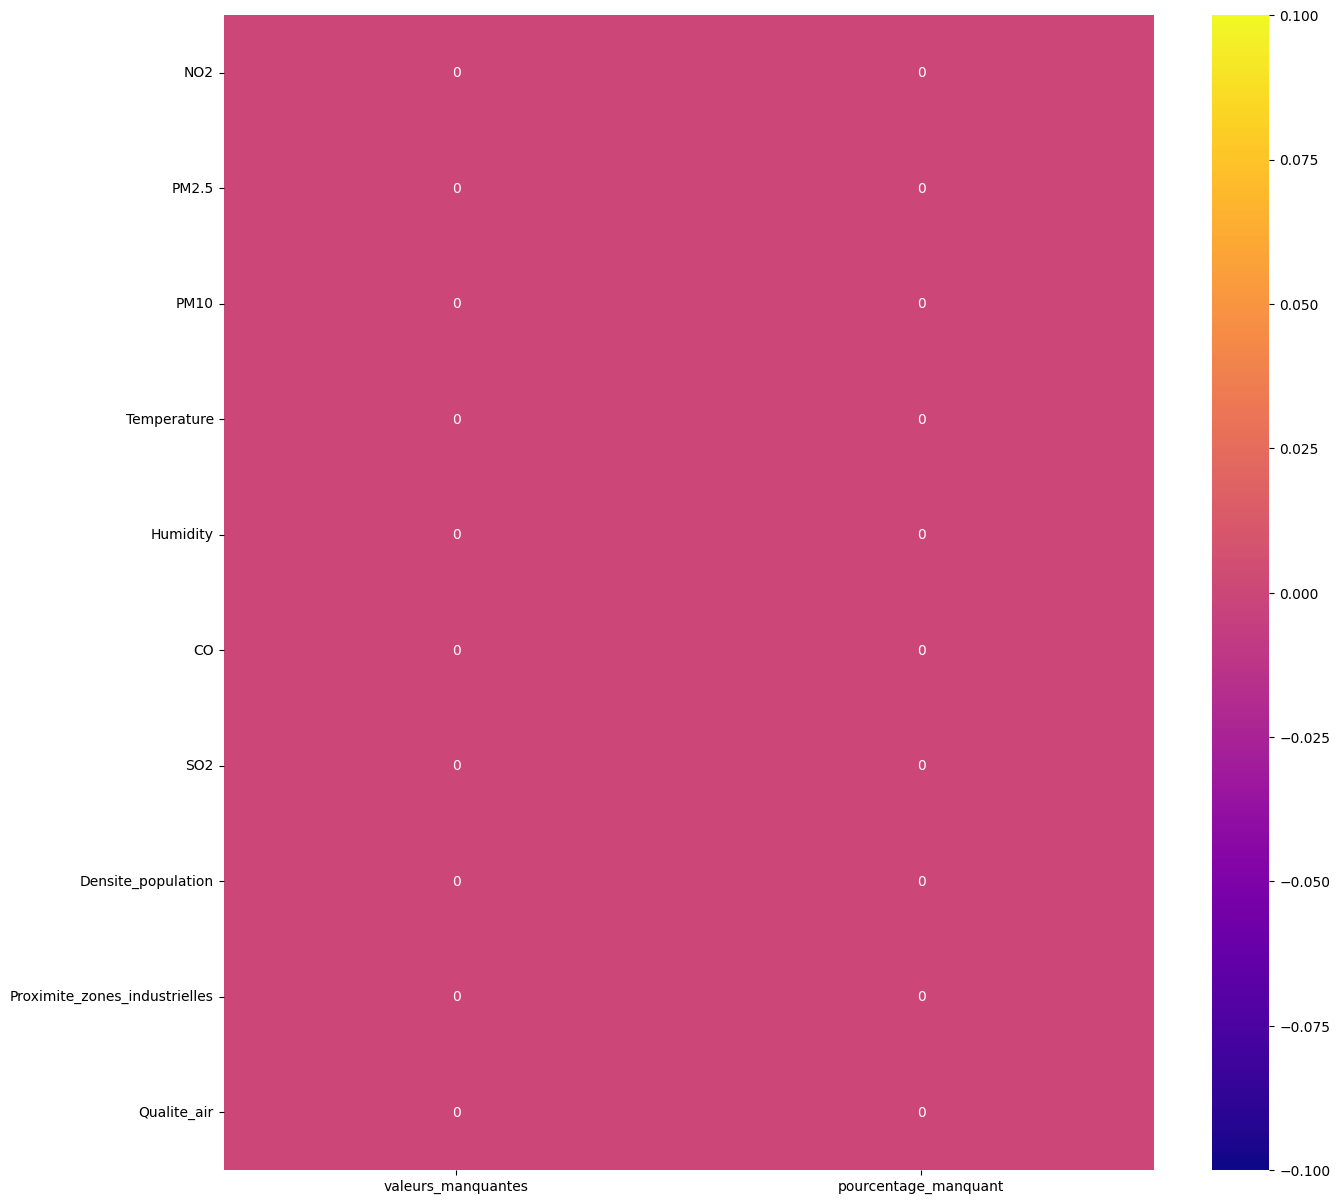

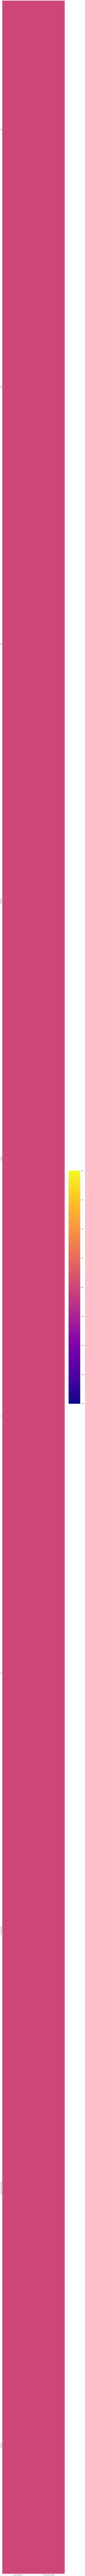

   Classe  Nombre  Pourcentage
0       0    2000         40.0
1       1    1500         30.0
2       2    1000         20.0
3       3     500         10.0
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  4997.000000  4997.000000  4995.000000  4996.000000  4995.000000   
mean     30.041227    70.078370    20.588075    30.338434    26.492296   
std       6.800710    15.886801    28.082109    28.078789    10.730231   
min     -17.892186    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.200000    38.100000    31.900000   
max      69.084008   128.100000   512.769377   372.644638   450.519784   

               SO2           CO  Proximite_zones_industrielles  \
count  4999.000000  4997.000000                    5000.000000   
mean     10.054020     1.509668               

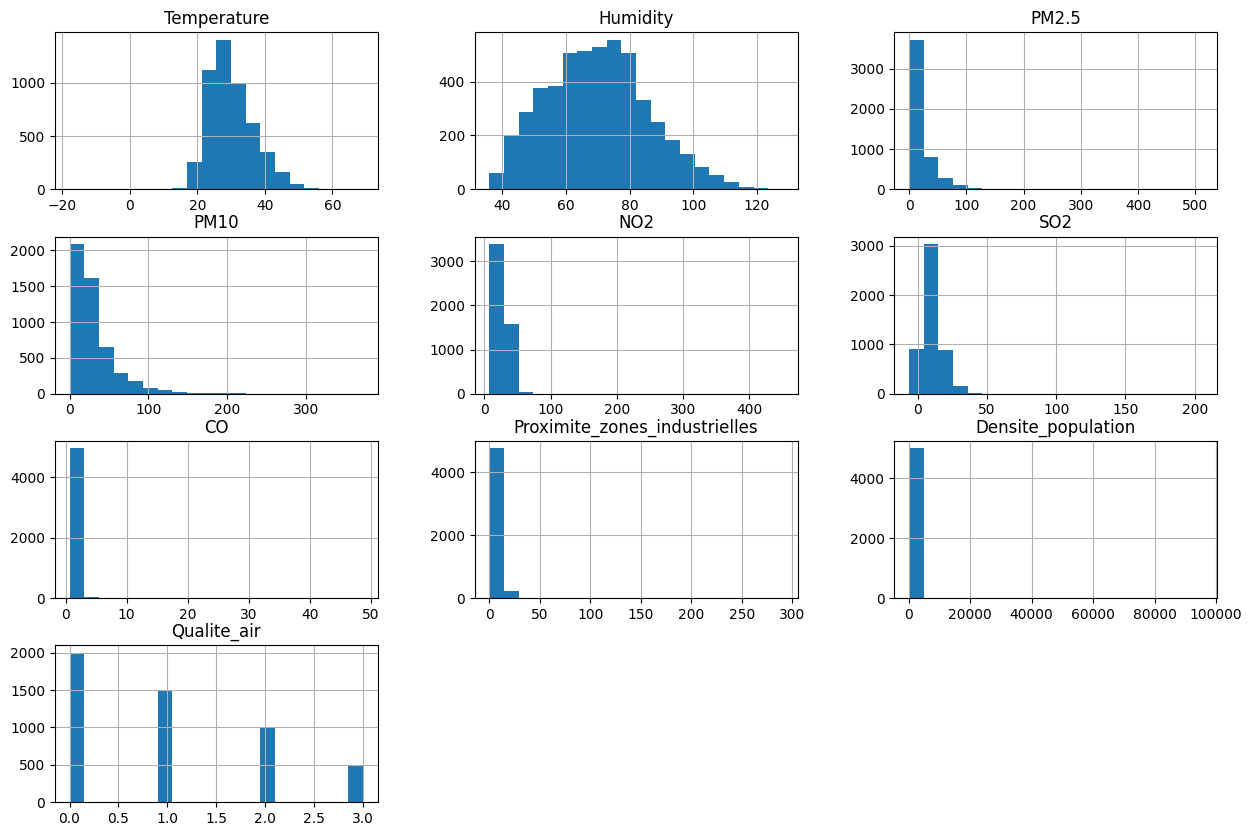

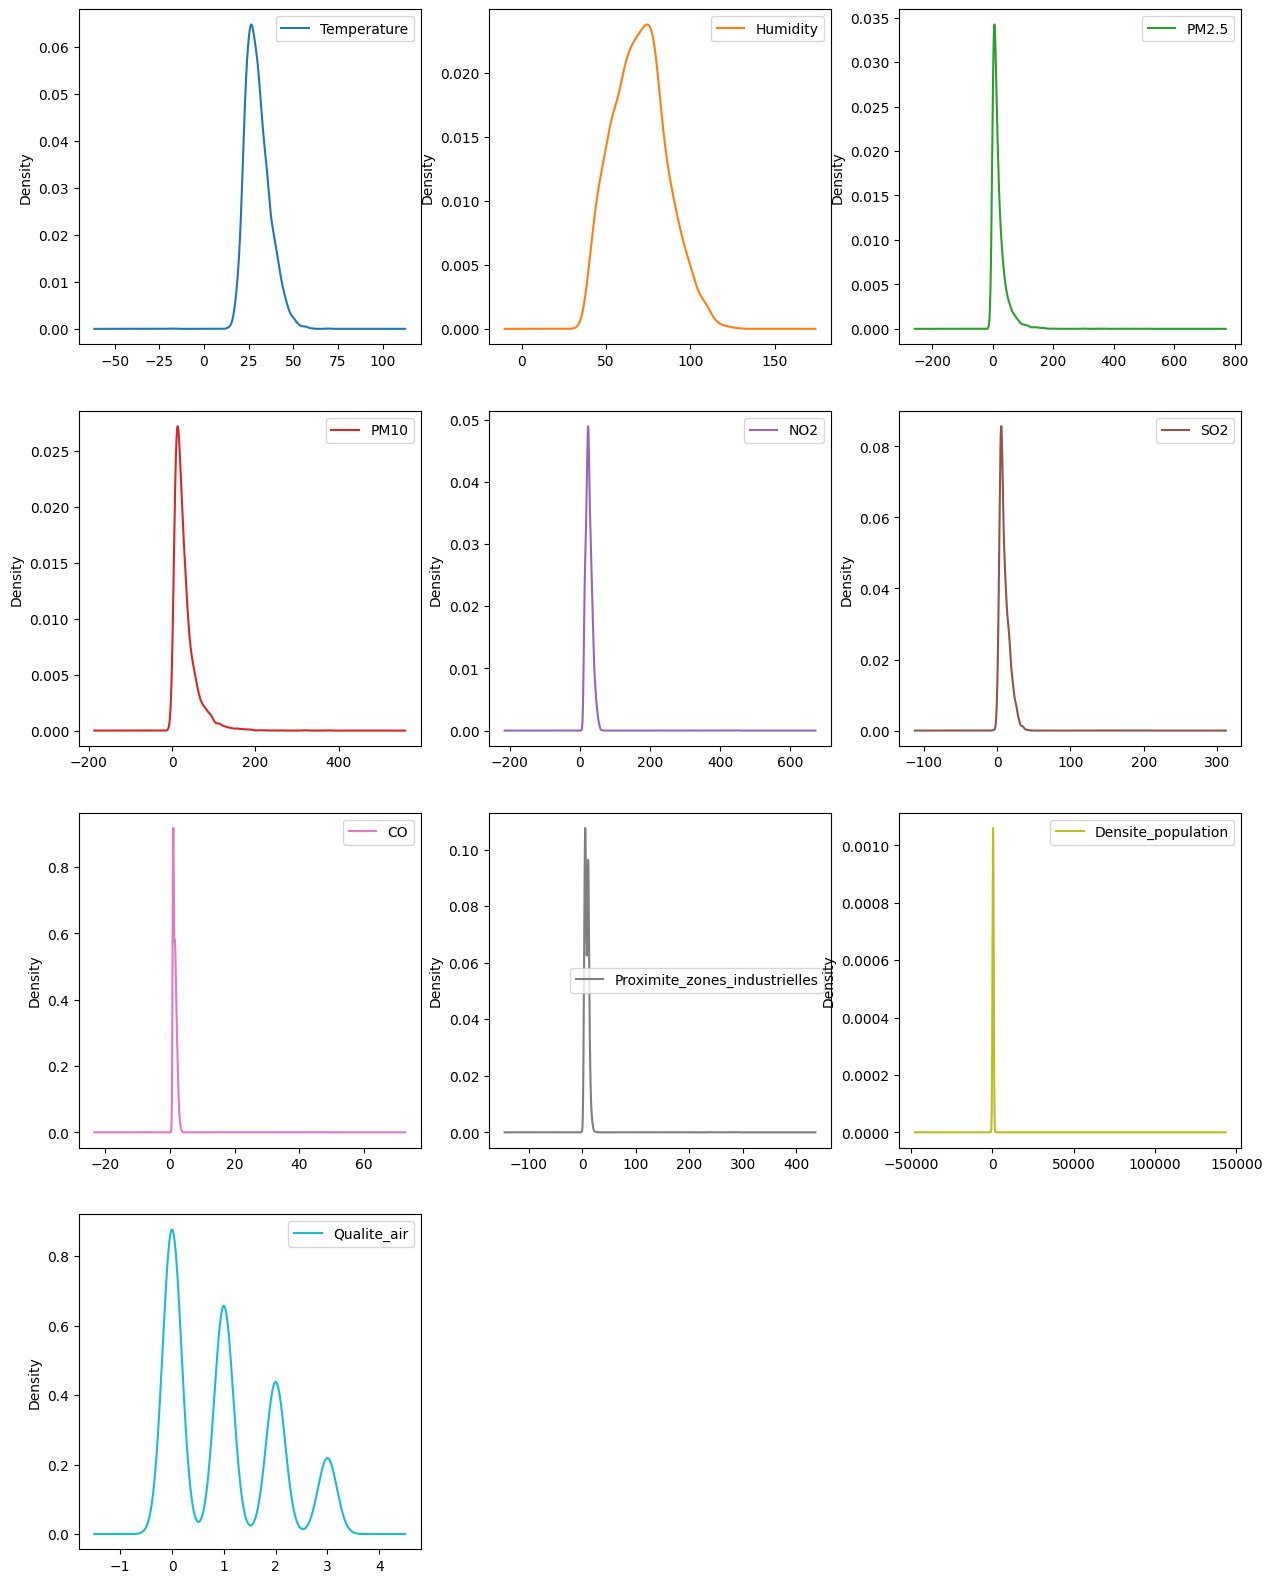

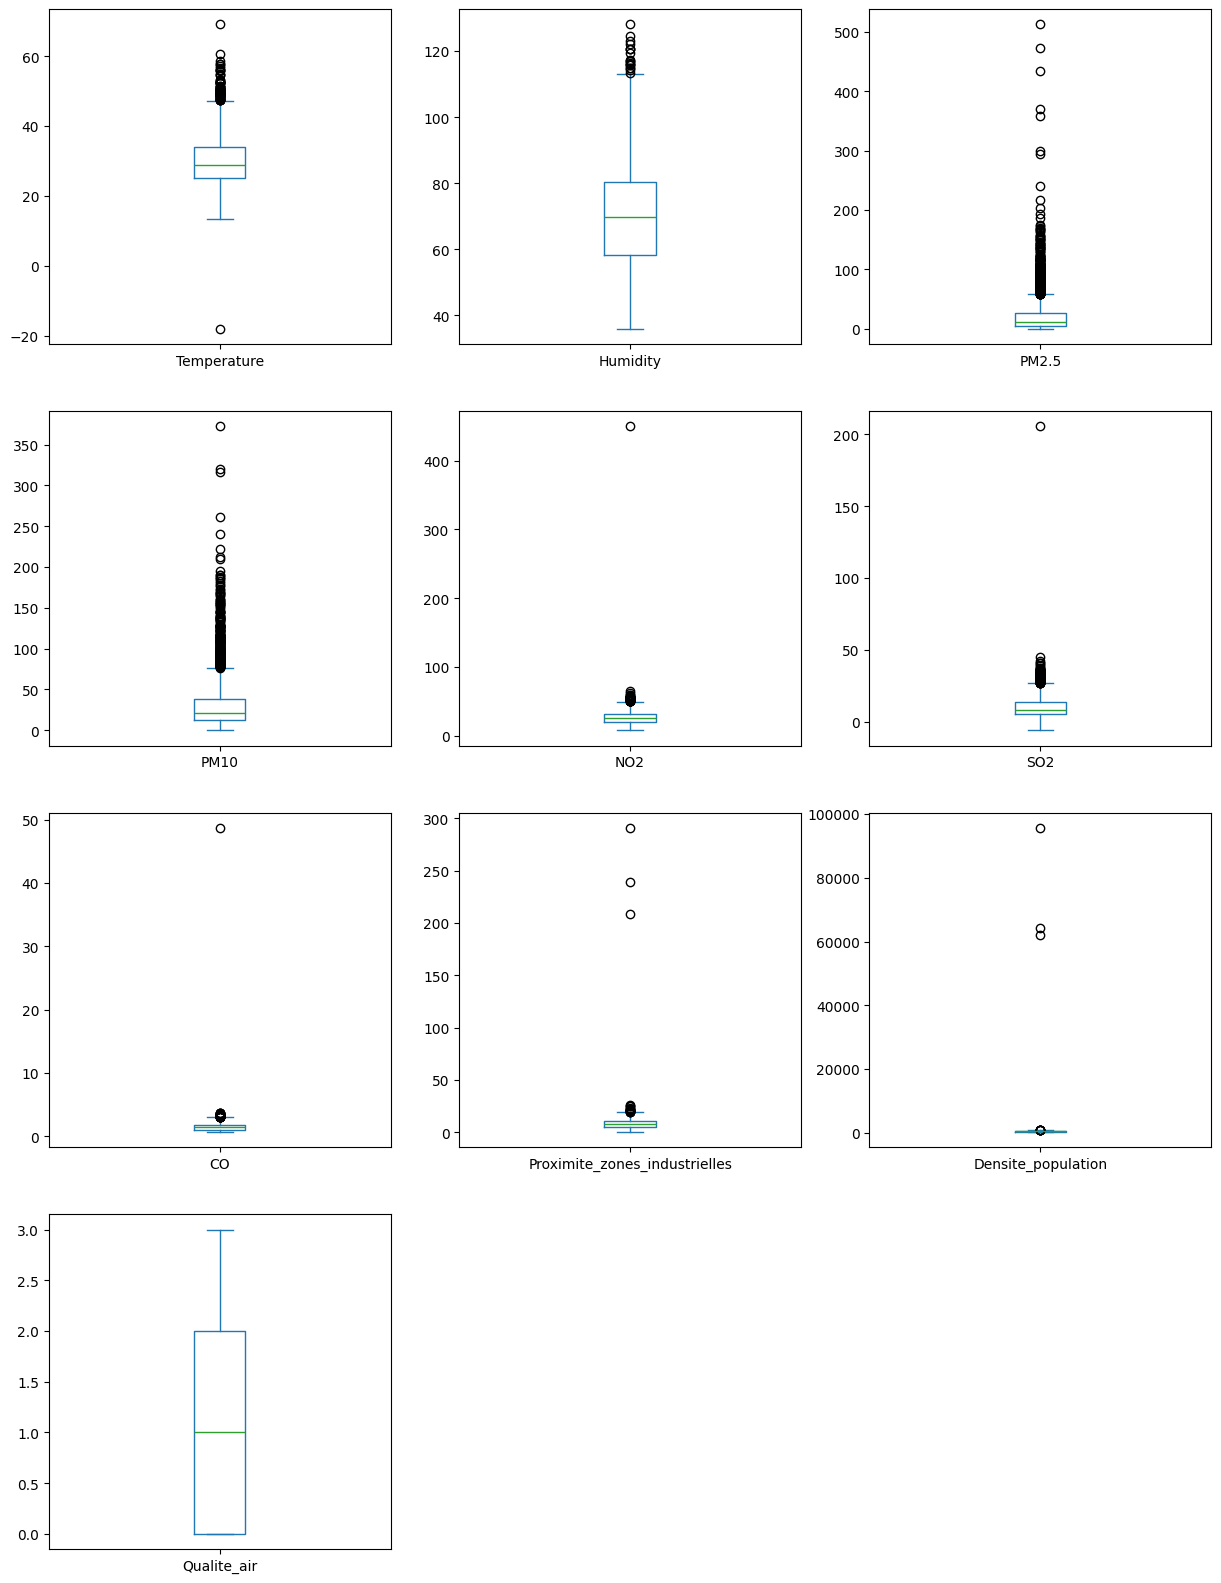

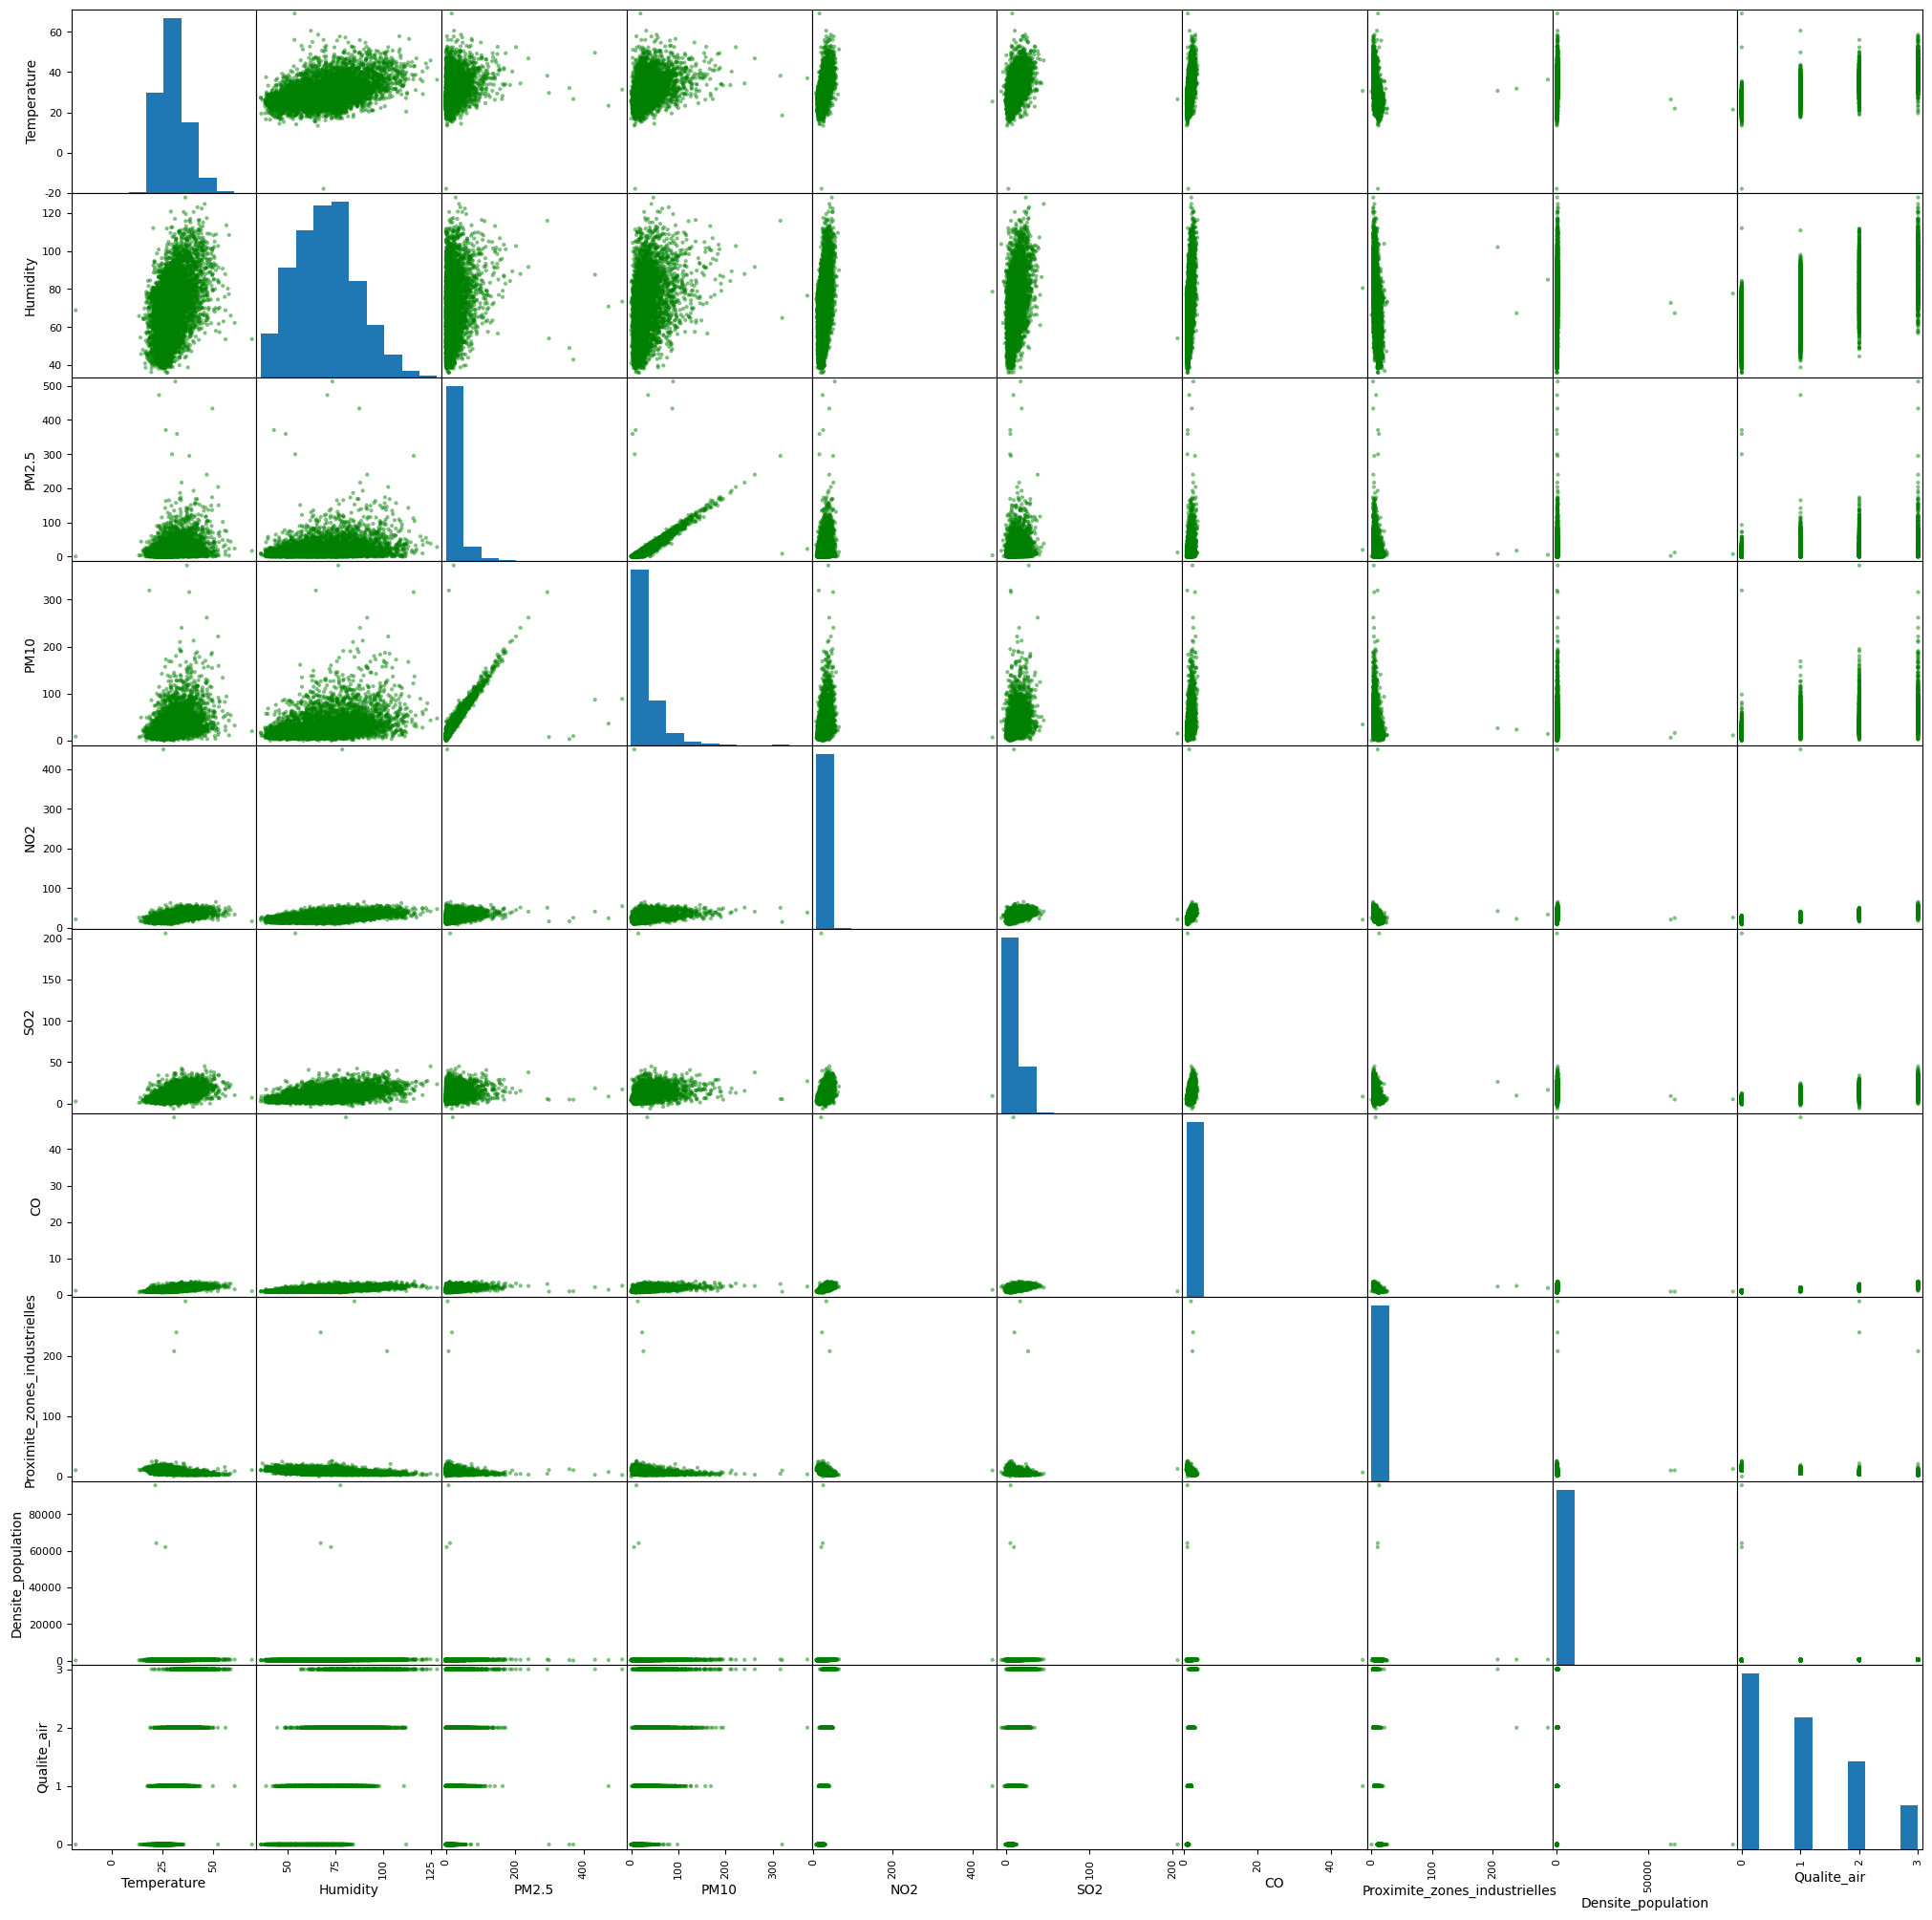

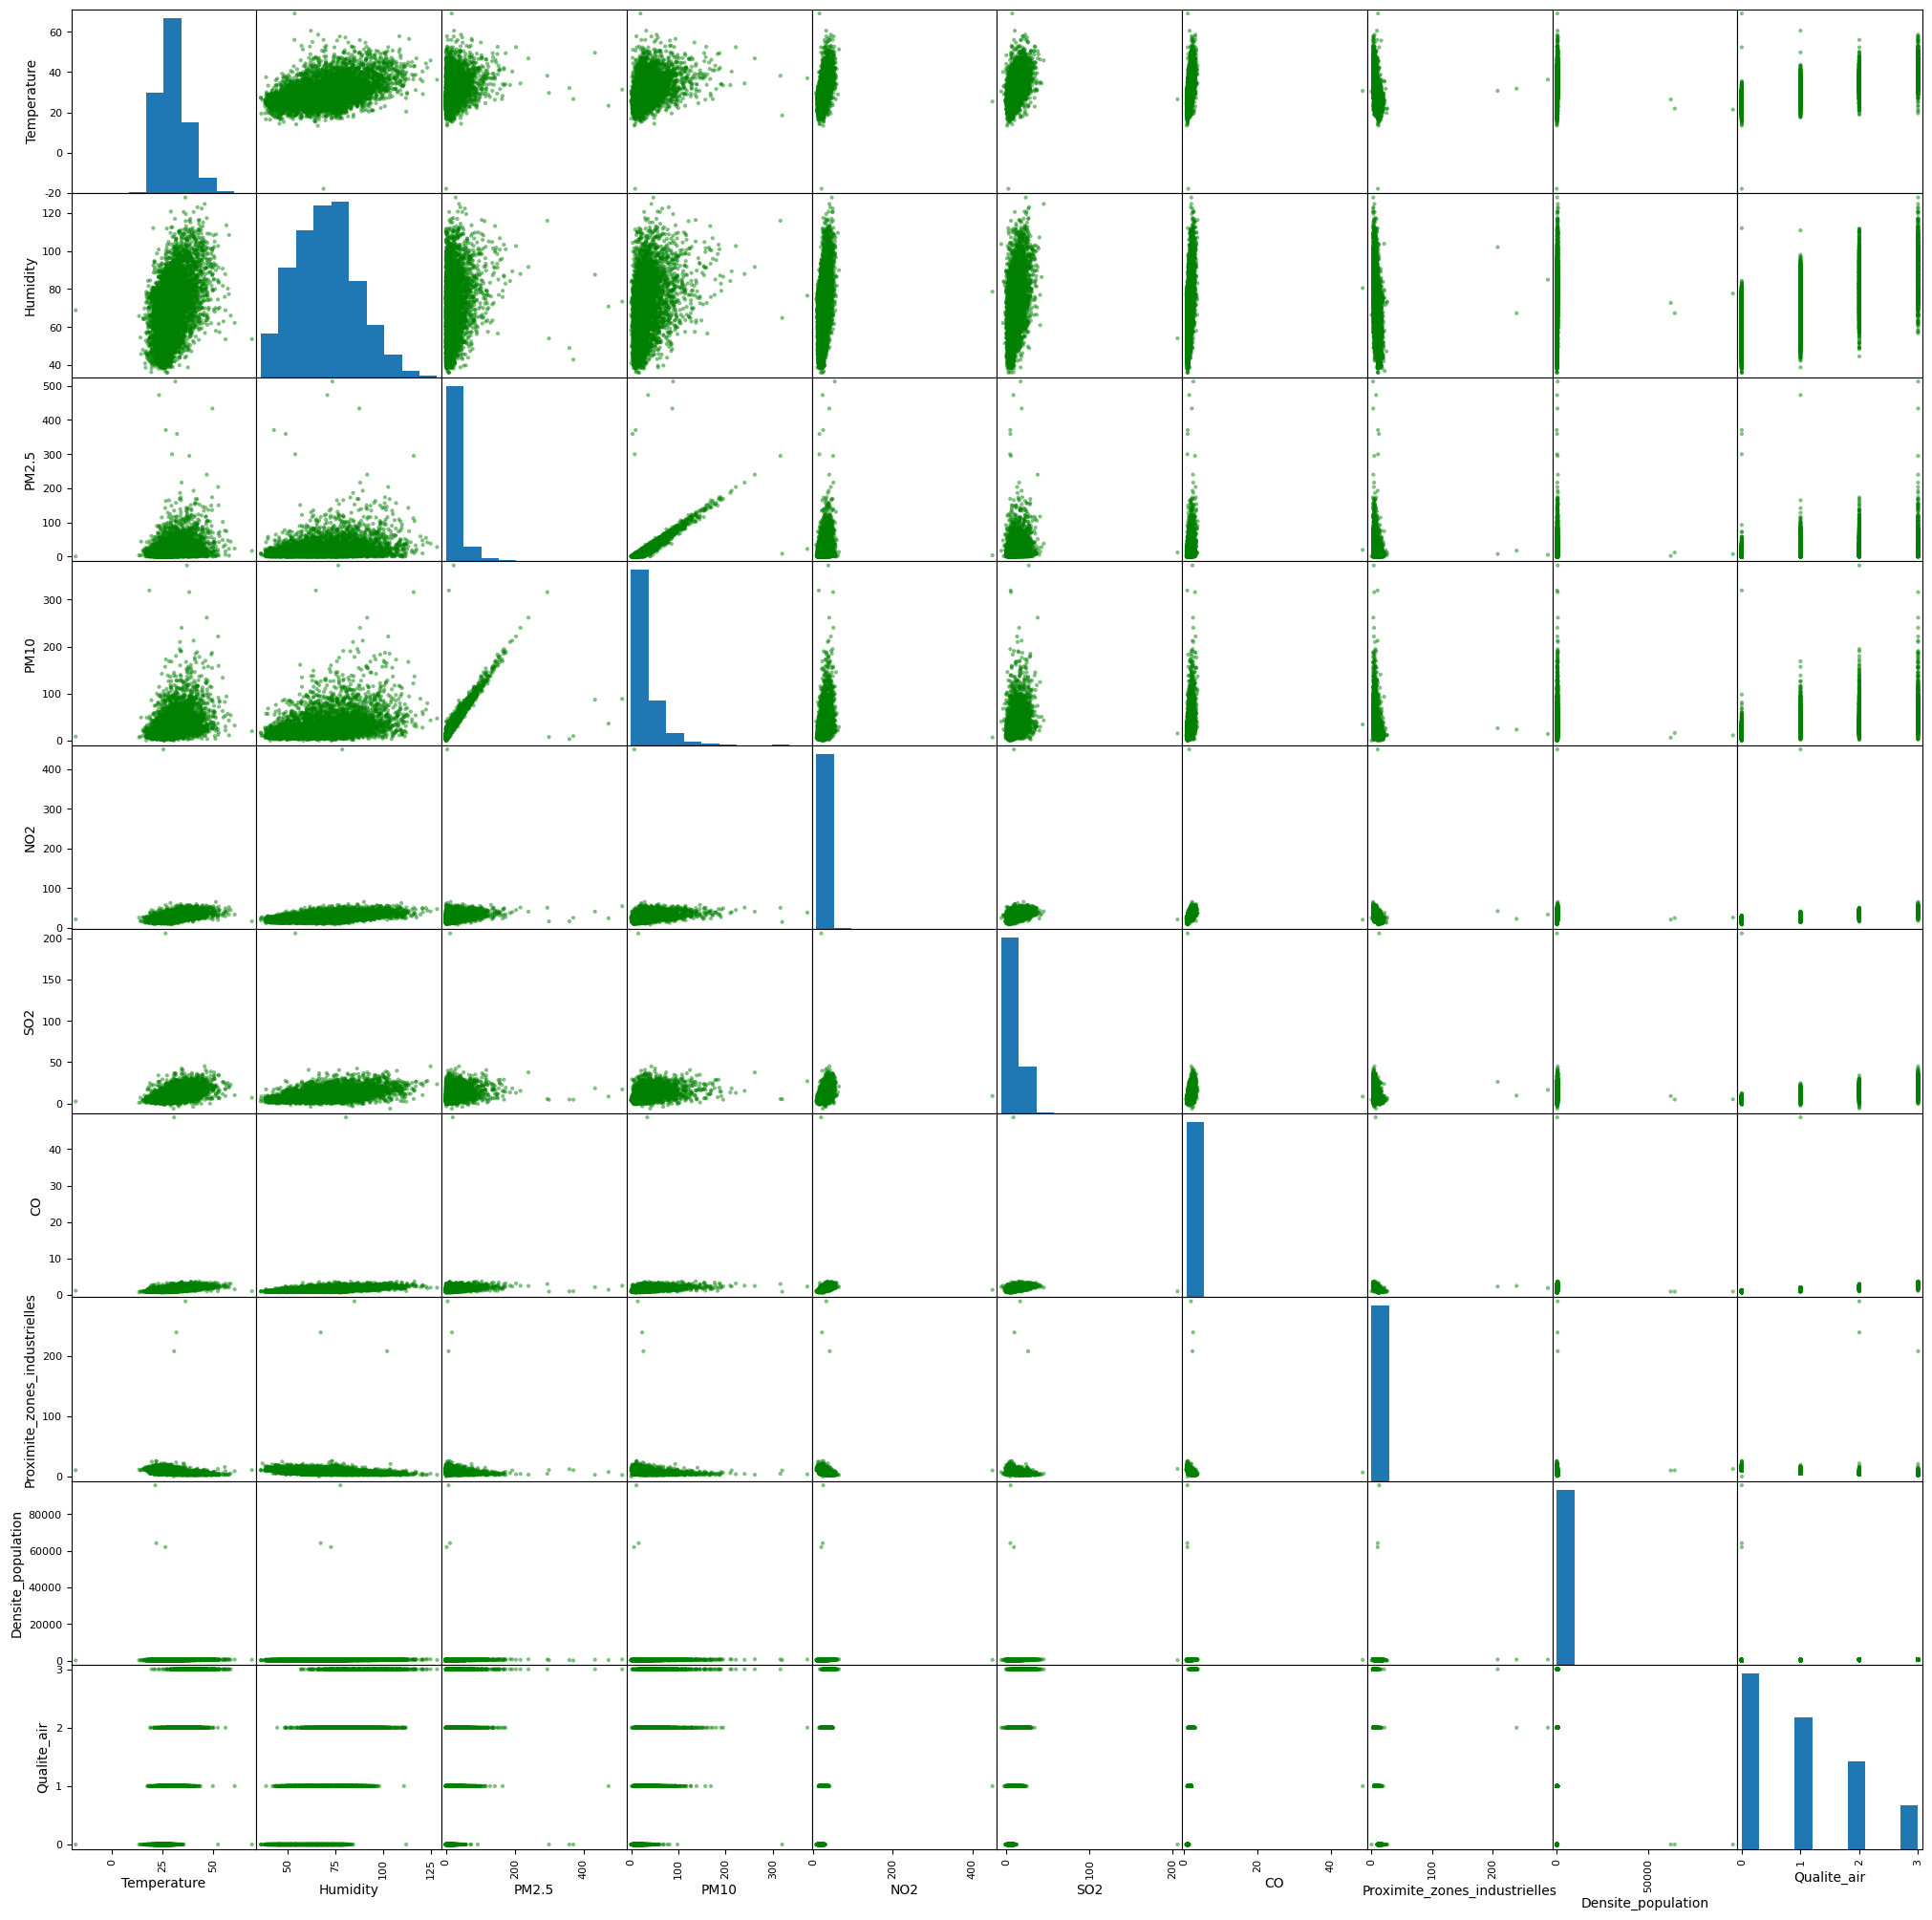

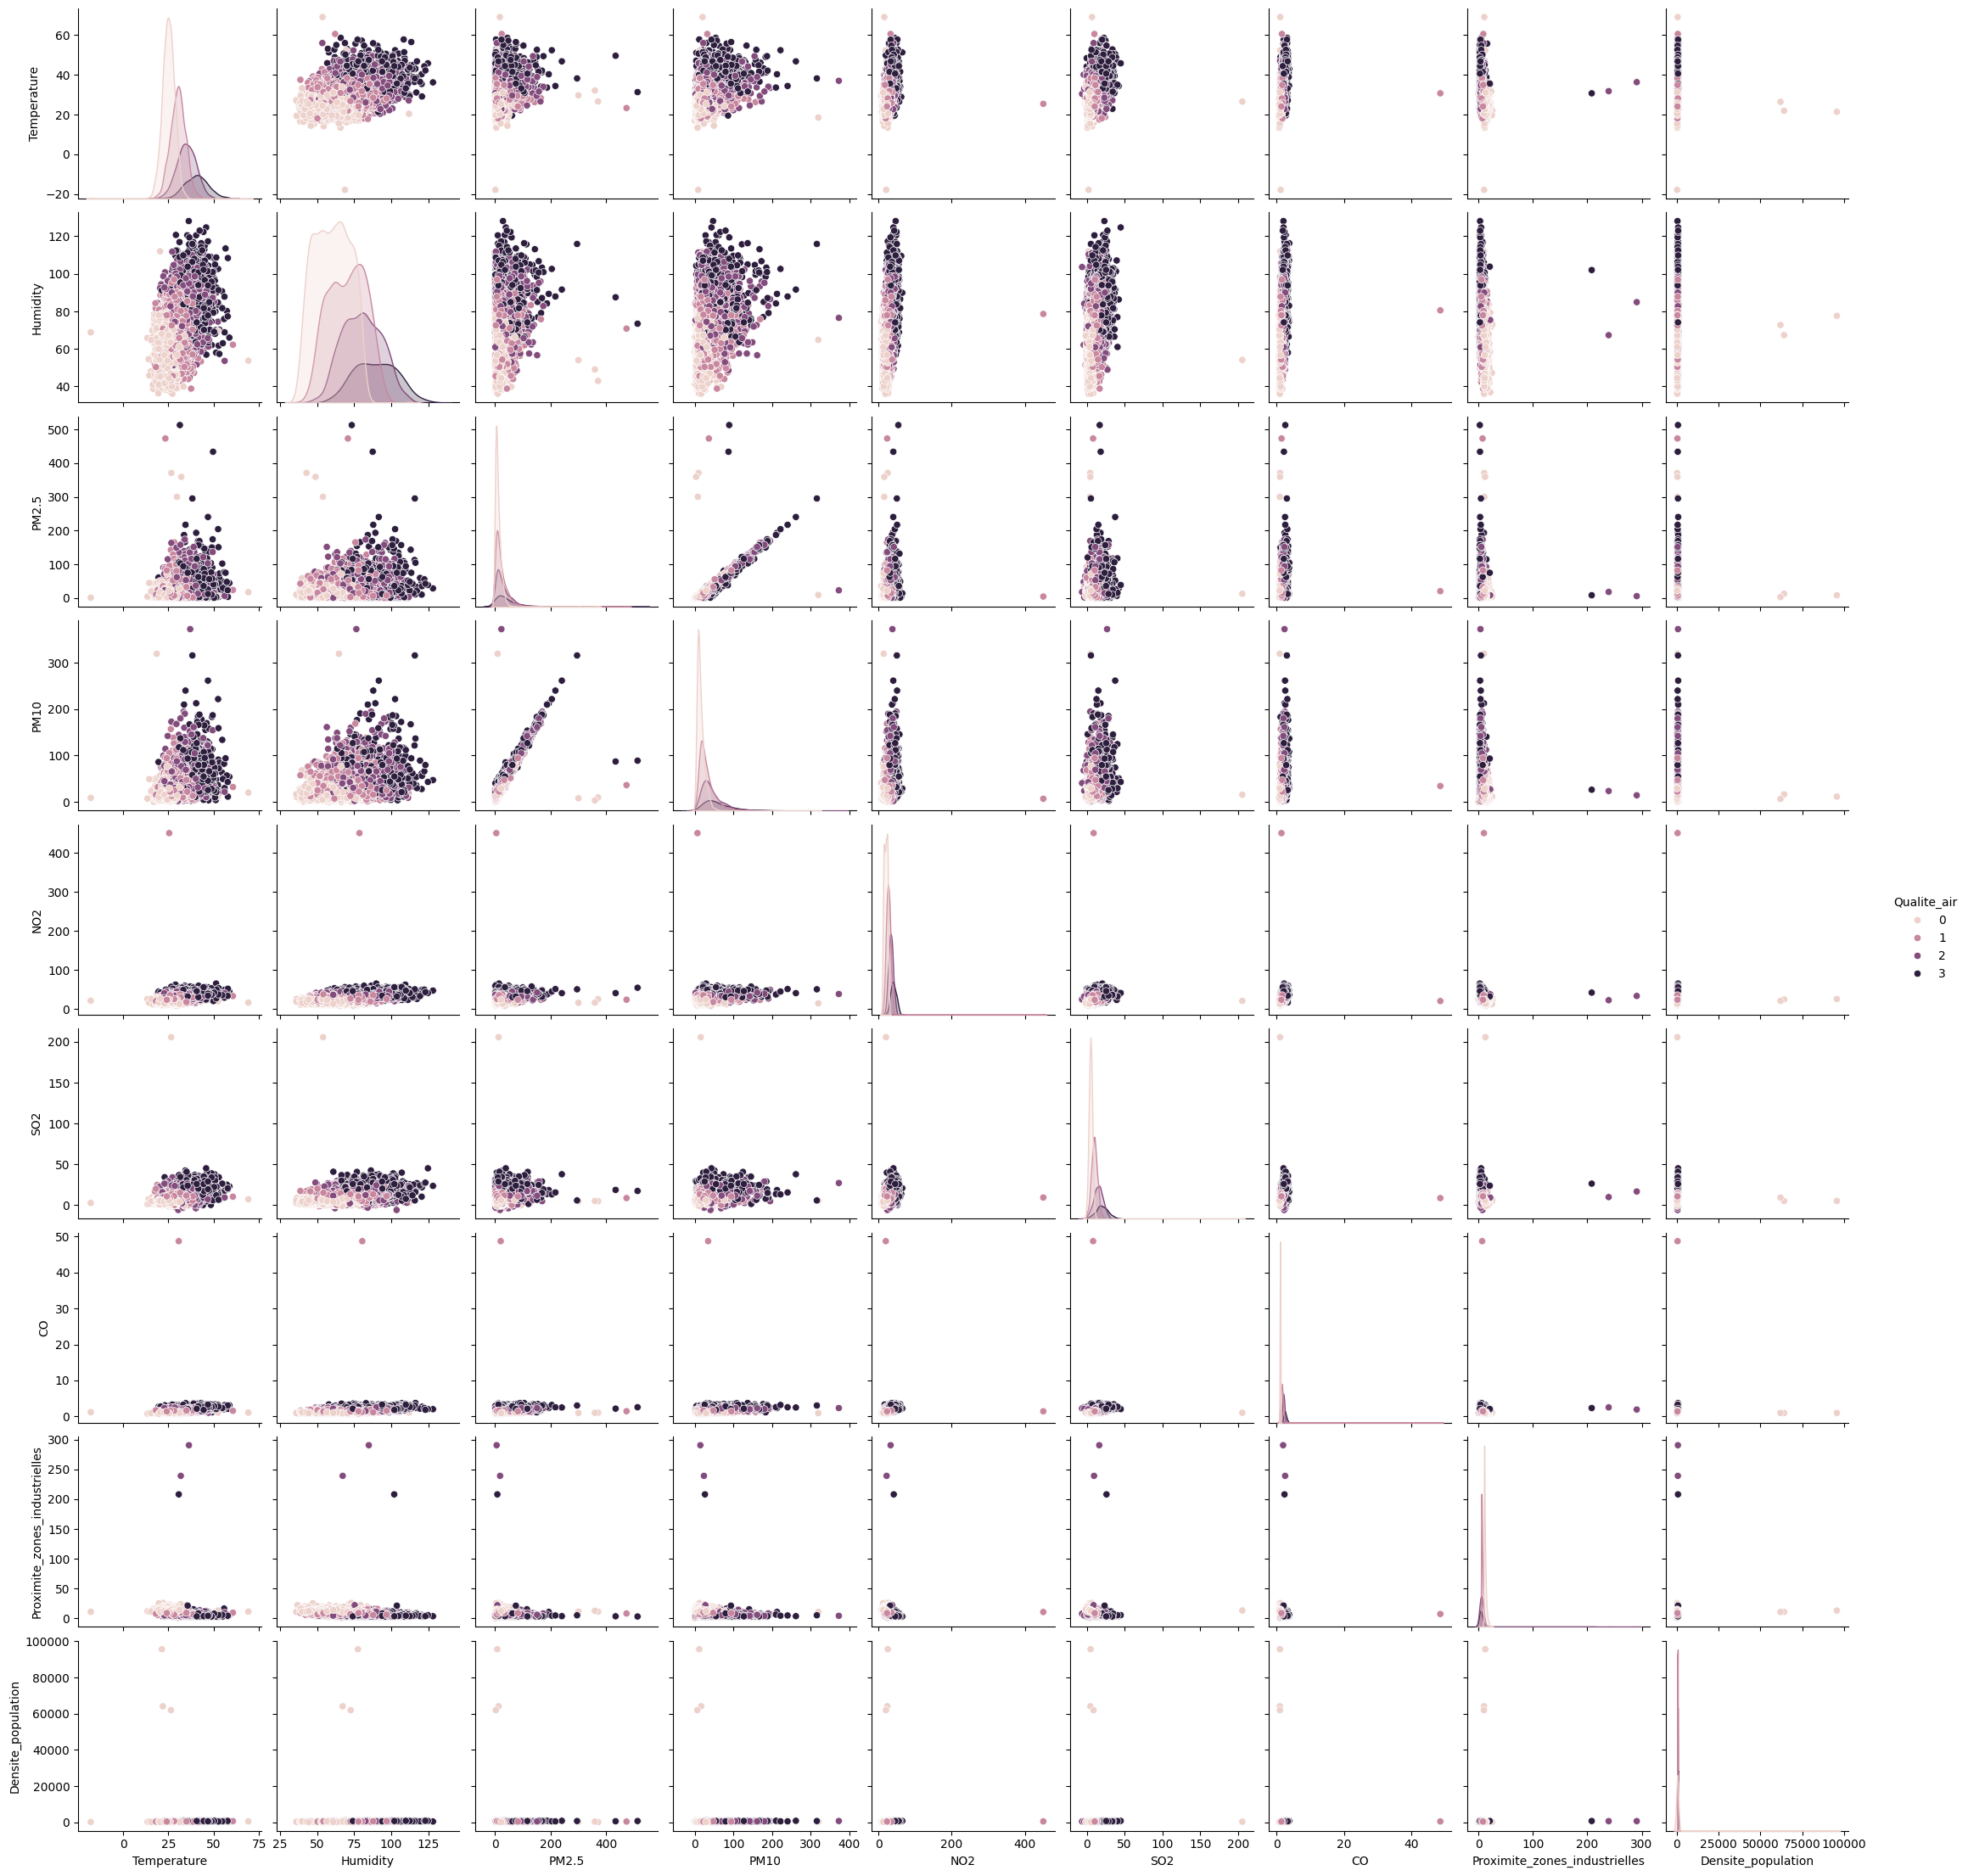

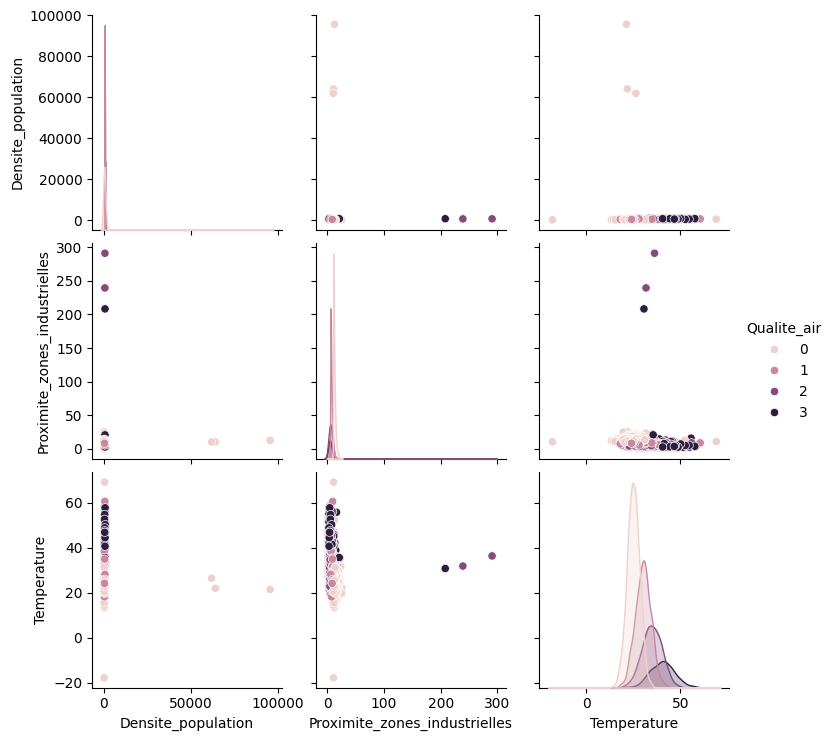

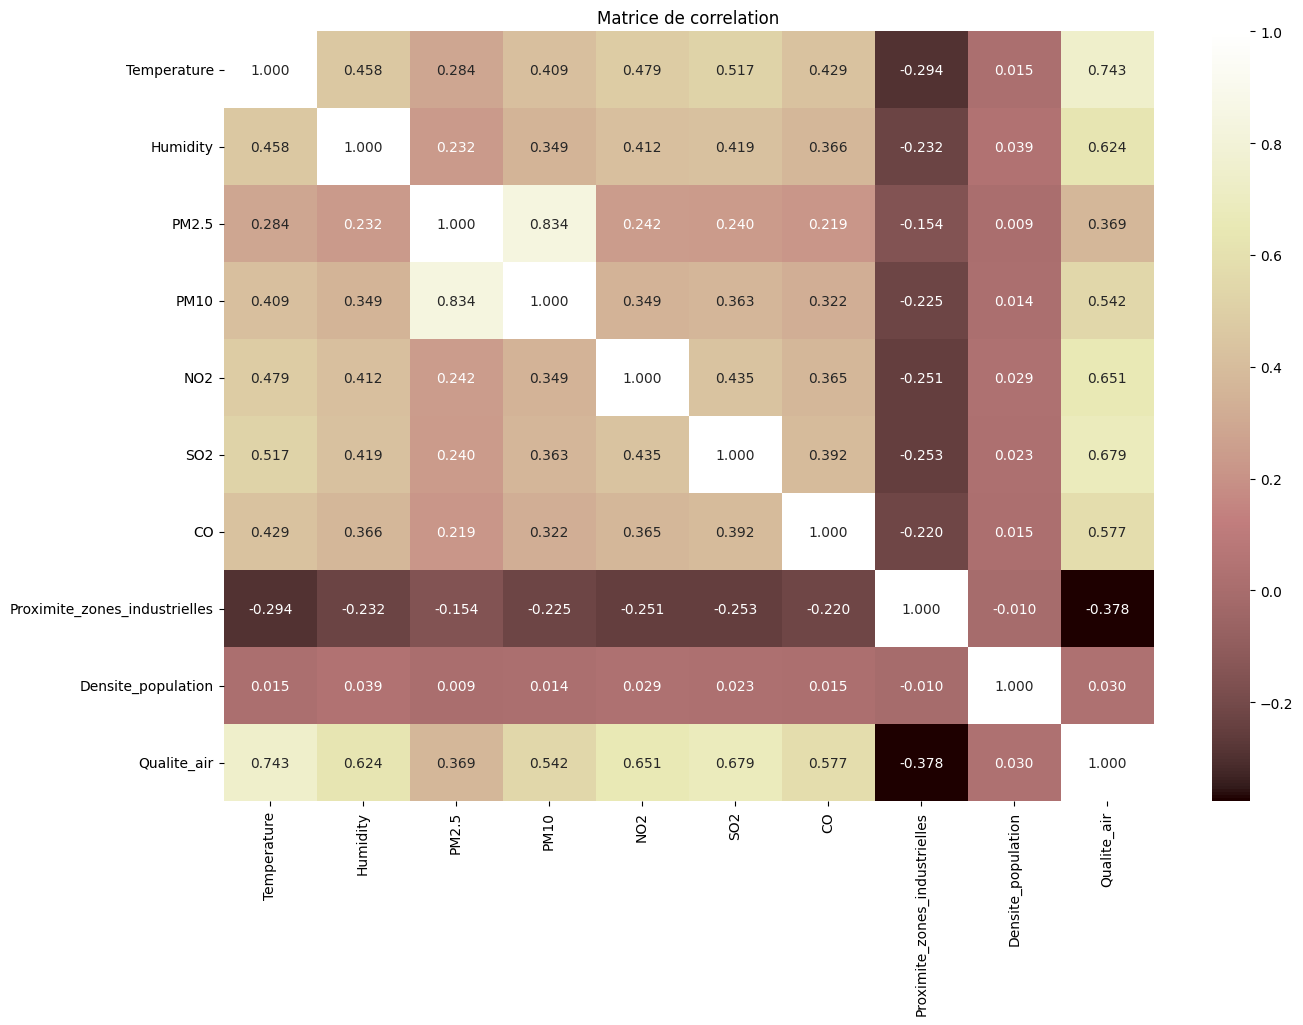

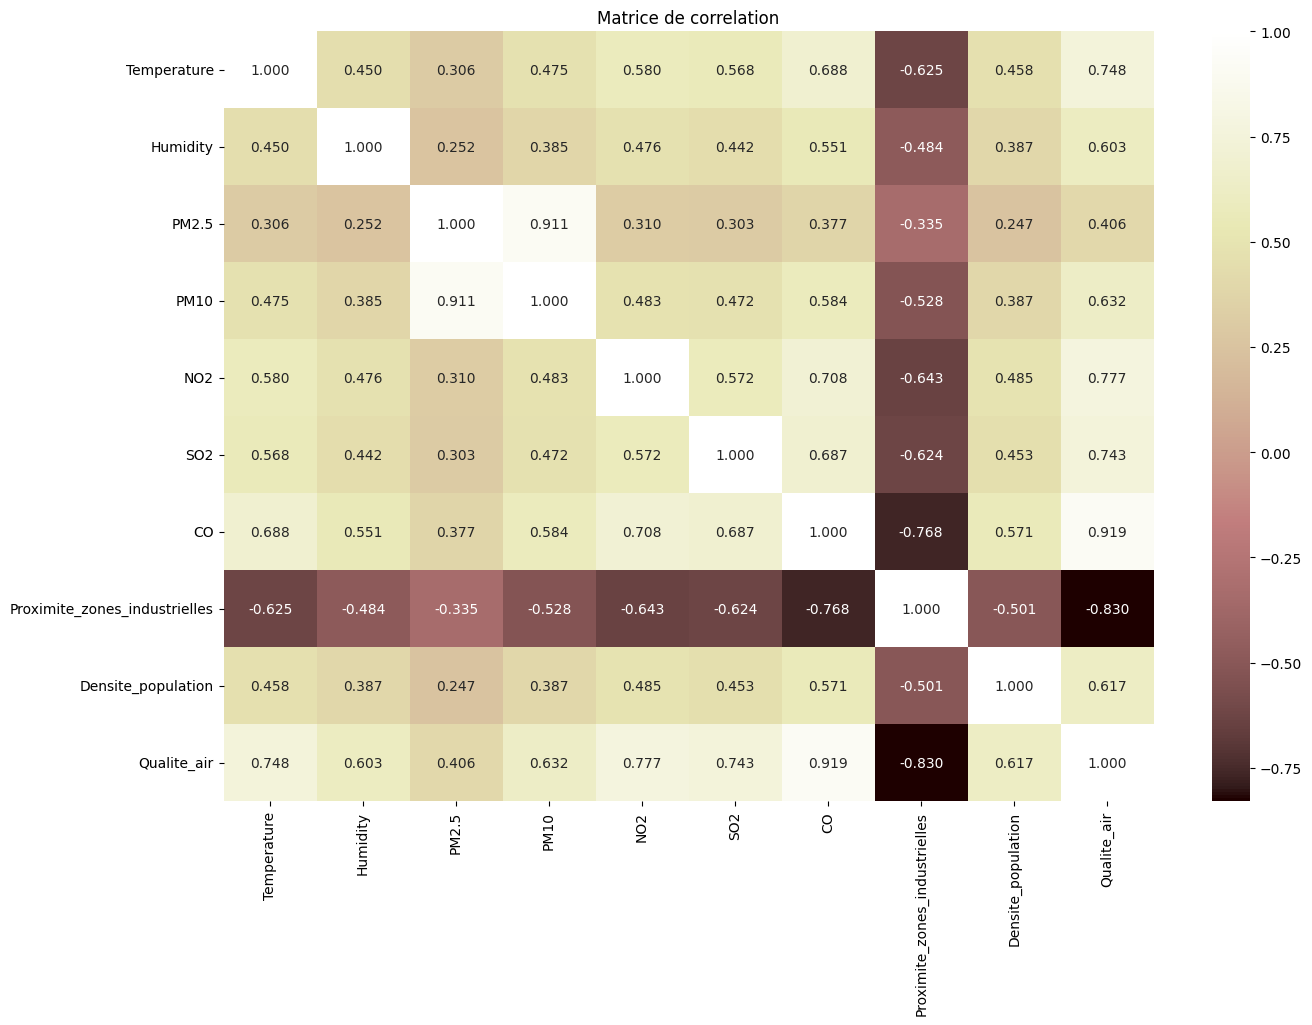

In [ ]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

fichier='pollution.csv'

data=pd.read_csv(fichier)
print(data)
#type de variable
type=data.dtypes
print(type)
#Les valeurs manquantes
valeur_manquante=data.isnull().sum()
print(f'les  valeurs manquantes sont :\n----------------\n{valeur_manquante}')
#nombre total des valeurs manquantes
valeur_manquante=data.isnull().sum().sum()
print(f'Le nombre total des valeurs manquantes est :\n----------------\n{valeur_manquante}')
#les 15 premières lignes 
print(f'les premières lignes sont:\n-------------------------------------------\n{data.head(15)}')
#les 15 dernières lignes
print(f'les dernières lignes sont:\n--------------------------------------------\n{data.tail(15)}')

# Calcul des valeurs manquantes
dataMissing= pd.DataFrame({
    'valeurs_manquantes': data.isnull().sum(),
    'pourcentage_manquant': data.isnull().mean() *100 
})

# Trier par nombre  décroissant
dataMissing = dataMissing.sort_values(by='valeurs_manquantes', ascending=False)

# Afficher
print(dataMissing)

# Sauvegarder en CSV
dataMissing.to_csv("rapport_valeurs_manquantes.csv", index=True)
print("✅ Rapport des valeurs manquantes sauvegardé dans 'rapport_valeurs_manquantes.csv'")

dm1=dataMissing.fillna(dataMissing.mean())
print(dm1)
dm1=dataMissing.fillna(dataMissing.median())
print(dm1)
sns.heatmap(dataMissing.isnull(),annot=True,cmap='plasma')
plt.show()
plt.figure(figsize=(15,15))
sns.heatmap(dataMissing.isnull().head(10),annot=True,cmap='plasma')
plt.show()
plt.figure(figsize=(15,15))
sns.heatmap(dm1.isnull().head(10),annot=True,cmap='plasma')
plt.show()
plt.figure(figsize=(15,500))
sns.heatmap(dataMissing.isnull(),annot=True,cmap='plasma')
plt.show()
count_classe = data['Qualite_air'].value_counts().reset_index()
count_classe.columns = ['Classe', 'Nombre']
count_classe['Pourcentage'] = (count_classe['Nombre'] / len(data) * 100).round(2)

print(count_classe)
print(data.describe())
print(data.info())
print(data.shape)

#Les histogrammes

data.hist(bins=20,figsize=(15,10),layout=(4,3),grid=True)
plt.title('Histogrammes des attribuits')
plt.show()
data.plot(kind='density',layout=(4,3),sharex=False,sharey=False,figsize=(15,20),subplots=True)
plt.show()
#Boites à Moustaches pour voir valeur aberrant, voir les porcentages
data.plot(kind='box',layout=(4,3),sharex=False,sharey=False,figsize=(15,20),subplots=True)
plt.show()
scatter_matrix(data,figsize=(25,25),c='green')
plt.show()
scatter_matrix(data,figsize=(25,25),c='green')
plt.show()
sns.pairplot(data,hue='Qualite_air')
plt.show()
sns.pairplot(data,hue='Qualite_air',vars=['Densite_population','Proximite_zones_industrielles','Temperature'])
plt.show()
#corrélation
corr=data.corr() #la correlation de Pearson

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.3f', cmap='pink')
plt.title('Matrice de correlation de Pearson')
plt.show()
corr2=data.corr(method='spearman')

plt.figure(figsize=(15,10))
sns.heatmap(corr2, annot=True, fmt='.3f', cmap='pink')
plt.title('Matrice de correlation de Spearman')
plt.show()


In [26]:
Q1 = data['CO'].quantile(0.25)
Q2 = data['CO'].quantile(0.50)
Q3 = data['CO'].quantile(0.75)

print(f"Q1 = {Q1}")
print(f"Médiane (Q2) = {Q2}")
print(f"Q3 = {Q3}")
print(f"IQR = {Q3 - Q1}")


Q1 = 1.03
Médiane (Q2) = 1.41
Q3 = 1.84
IQR = 0.81
